# Principle Component Analysis

In [1]:
import numpy as np

In [2]:
with open("Word List.txt", "r", encoding='ascii', errors='ignore') as f:
    data = f.readlines()

In [3]:
word_list = [d.strip() for d in data]

In [4]:
with open("glove.6B.50d.txt", "r", encoding='utf-8') as f:
    emb = f.readlines()

In [5]:
emb_dict = {}

for word in emb:
    word = word.strip().split()
    vec = np.array(list(map(float, word[1:])))
    emb_dict[word[0]] = vec

In [6]:
word_used = {}

for word in word_list:
    vec = emb_dict.get(word, None)
    if vec is not None:
        word_used[word] = vec

In [7]:
len(word_used)

893

In [8]:
class PCA:
    def __init__(self, n_components = 2):
        self.n_components = n_components
        self.evecs = None
        self.evals = None
        
    def fit_transform(self, X):
        mean = np.mean(X, axis = 0)
        X = X - mean
        cov = np.cov(X, rowvar=False)
        eigen_vals, eigen_vecs = np.linalg.eigh(cov)
        
        idxs = np.argsort(eigen_vals)[::-1]
        
        self.evecs = eigen_vecs[:, idxs]
        self.evals = eigen_vals[idxs]
        
        comp = self.evecs[:, :self.n_components]
        
        return np.dot(X, comp)

In [9]:
emb_arr = np.array(list(word_used.values()))

In [10]:
emb_arr.shape

(893, 50)

In [11]:
pca = PCA()

result = pca.fit_transform(emb_arr)

In [12]:
result

array([[ 2.33151099e-01,  6.66347792e-01],
       [-5.73053100e-01, -6.37139655e-01],
       [-1.51531748e+00, -3.91992954e-01],
       ...,
       [ 3.32671647e-01, -2.49238034e-03],
       [-1.14370761e+00,  1.51536610e+00],
       [ 2.58966484e+00,  4.81501610e-01]])

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


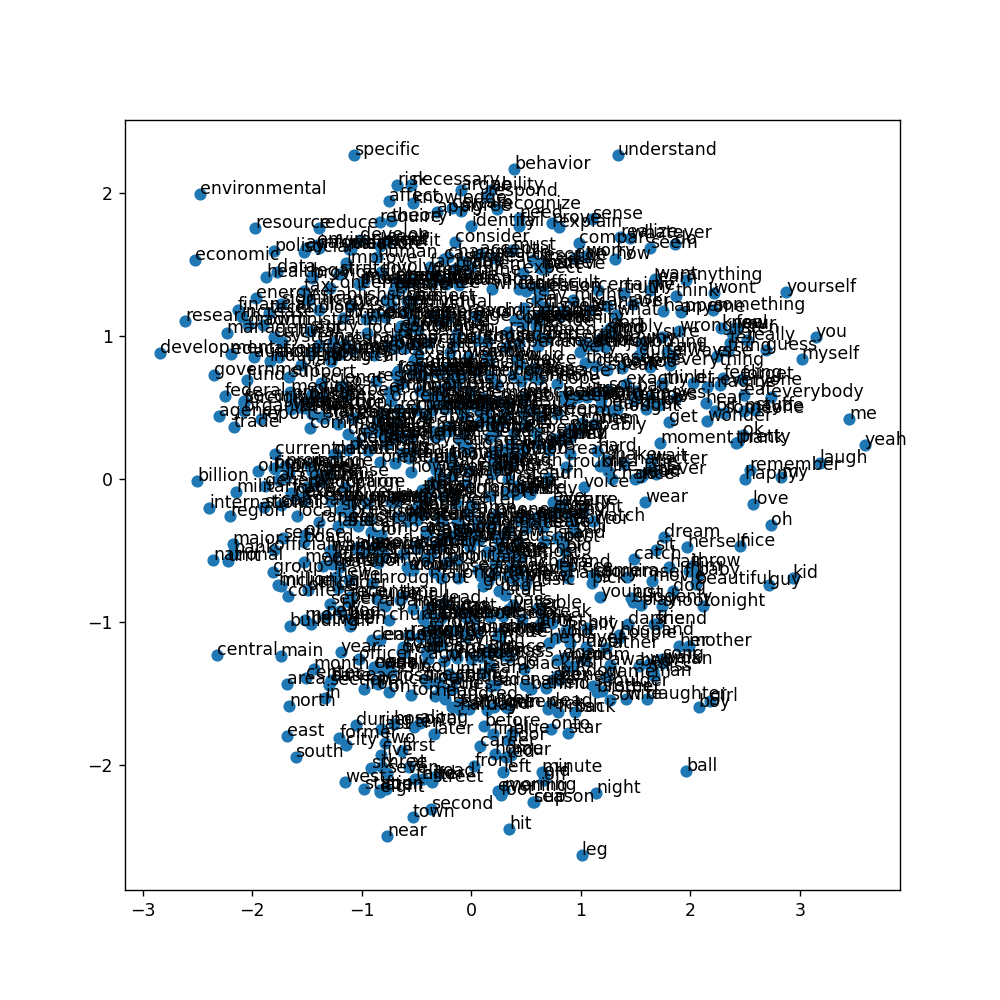

In [14]:
fig = plt.figure(figsize=(8, 8))

plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(word_used.keys()):
    plt.annotate(word, [result[i, 0], result[i, 1]])